## OpenCV位元平面分解
1. 位元平面分解
2. 影像加密與解密
3. 影像局部打碼及解碼
4. 影像浮水印

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import cv2
%matplotlib inline

In [2]:
%%html 
<style> 
table {float:left} 
</style> 

In [3]:
print('openCV version:', cv2.__version__)
print('python version:', sys.version)

openCV version: 3.4.1
python version: 3.5.2 (default, Sep 14 2017, 22:51:06) 
[GCC 5.4.0 20160609]


## 影像位元平面

在8bit位元深度的影像中，每個像素值都可以表示為:

$value = a_7 \times 2^7 + a_6 \times 2^6 + a_5 \times 2^5 + a_4 \times 2^4 + a_3 \times 2^3 + a_2 \times 2^2 + a_1 \times 2^1 + a_0 \times 2^0$

可以看出$a_7$對整個值的影響最大，$a_0$的影響則最小，將$a_i \times 2^i$值獨立取出製作出來的圖就稱為位元平面分解。

舉例來說，一張灰階圖有四個pixels，其十進位數值如下:

$
\begin{array}{|c|c|}
\hline
150 & 64 \\
\hline
141 & 210 \\
\hline
\end{array}
$

將其轉為二進位值:

$
\begin{array}{|c|c|}
\hline
10010110 & 01000000 \\
\hline
10001101 & 11010010 \\
\hline
\end{array}
$

轉為8個位元平面

第一階　第二階　第三階　第四階　第五階　　第六階　第七階　　第八階

$
\begin{array}{|c|c|}
\hline
0 & 0 \\
\hline
1 & 0 \\
\hline
\end{array}
\begin{array}{|c|c|}
\hline
2 & 0 \\
\hline
0 & 2 \\
\hline
\end{array}
\begin{array}{|c|c|}
\hline
4 & 0 \\
\hline
4 & 0 \\
\hline
\end{array}
\begin{array}{|c|c|}
\hline
0 & 0 \\
\hline
8 & 0 \\
\hline
\end{array}
\begin{array}{|c|c|}
\hline
16 & 0 \\
\hline
0 & 16 \\
\hline
\end{array}
\begin{array}{|c|c|}
\hline
0 & 0 \\
\hline
0 & 0 \\
\hline
\end{array}
\begin{array}{|c|c|}
\hline
0 & 64 \\
\hline
0 & 64 \\
\hline
\end{array}
\begin{array}{|c|c|}
\hline
128 & 0 \\
\hline
128 & 128 \\
\hline
\end{array}
$

將每個圖分別畫出就可以查看該階位元平面的圖片了，而在畫出圖片的時候，會習慣將非0的數字以255取代，增加圖片的辨識度，若要進行彩色圖片的位元平面分解，要進行三個通道的位元平面分解，最後再將各通道的平面合成為一個三通道位元平面。

第 0 階位元平面


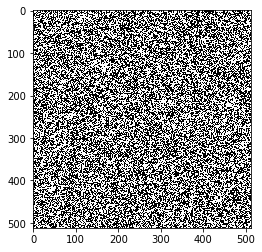

第 1 階位元平面


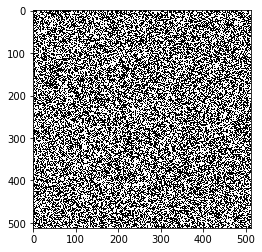

第 2 階位元平面


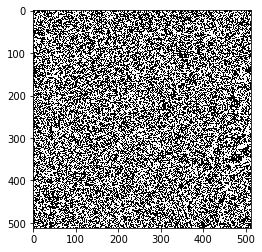

第 3 階位元平面


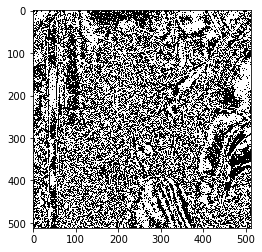

第 4 階位元平面


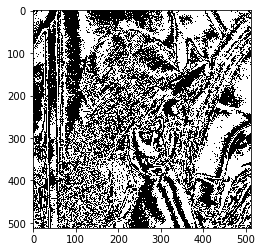

第 5 階位元平面


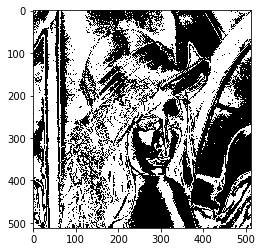

第 6 階位元平面


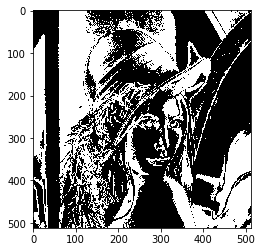

第 7 階位元平面


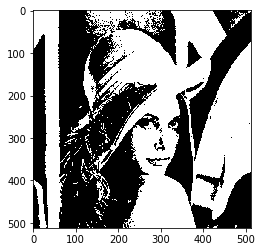

原始灰階圖


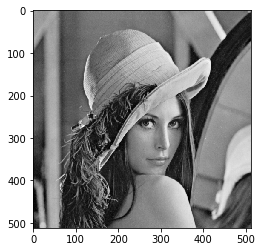

In [4]:
# 以灰階lenna圖做範例
img_BGR_lenna = cv2.imread('data/Lenna.png')
img_RGB_lenna = cv2.cvtColor(img_BGR_lenna, cv2.COLOR_BGR2RGB)
img_gray_lenna = cv2.cvtColor(img_BGR_lenna, cv2.COLOR_BGR2GRAY)

x = np.zeros((img_gray_lenna.shape[0], img_gray_lenna.shape[1], 8), dtype = np.uint8)

# 先將整個第i階位元平面皆以2的i次方值填滿
for i in range(8):
    x[:, :, i] = 2**i
    
# r是最後結果的位元平面矩陣
r = np.zeros((img_gray_lenna.shape[0], img_gray_lenna.shape[1], 8), dtype = np.uint8)

for i in range(8):
    # 做逐位元and運算，因為x中只有對應i的位置會是1其餘位置都會是0(二進位表示法)，所以對x做逐位元and運算，
    # 將可以看出該位置是否也為1(其餘位置皆會是0，若該位置也為0，最後十進位的值也會為0)
    r[:, :, i] = cv2.bitwise_and(img_gray_lenna, x[:, :, i])
    # 大於0代表該點二進位值在i位置也為1
    mask = r[:, :, i] > 0
    # 將其改為255，顯示起來較為好看(否則第0階的圖0與1在圖片上看不出差異)
    r[mask] = 255
    print('第', i, '階位元平面')
    plt.imshow(r[:, :, i], cmap = 'gray')
    plt.show()
    
print('原始灰階圖')
plt.imshow(img_gray_lenna, cmap = 'gray')
plt.show()

第 0 階位元平面


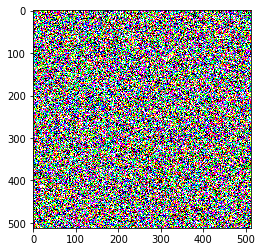

第 1 階位元平面


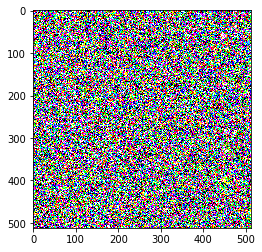

第 2 階位元平面


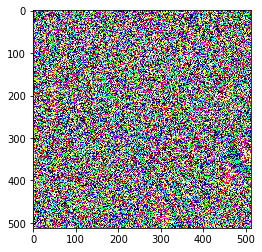

第 3 階位元平面


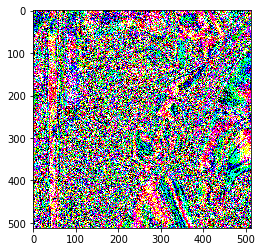

第 4 階位元平面


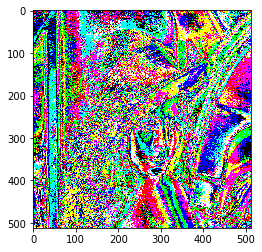

第 5 階位元平面


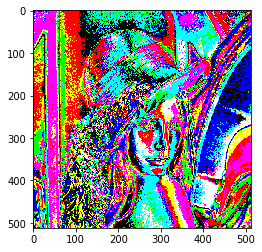

第 6 階位元平面


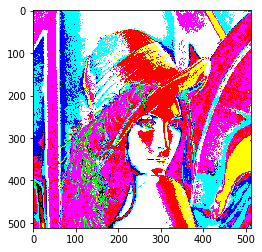

第 7 階位元平面


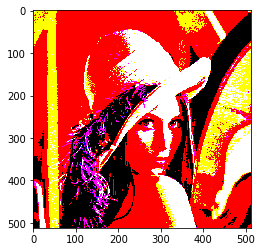

原始彩色圖


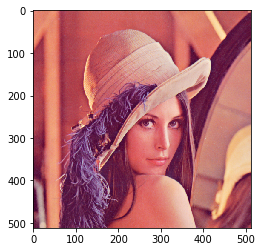

In [5]:
# 以彩色lenna圖做範例
x = np.zeros((img_RGB_lenna.shape[0], img_RGB_lenna.shape[1], img_RGB_lenna.shape[2], 8), dtype = np.uint8)

# 先將整個第i階位元平面皆以2的i次方值填滿
for i in range(8):
    x[:, :, :, i] = 2**i
    
# r是最後結果的位元平面矩陣
r = np.zeros((img_RGB_lenna.shape[0], img_RGB_lenna.shape[1], img_RGB_lenna.shape[2], 8), dtype = np.uint8)

for i in range(8):
    # 做逐位元and運算，因為x中只有對應i的位置會是1其餘位置都會是0(二進位表示法)，所以對x做逐位元and運算，
    # 將可以看出該位置是否也為1(其餘位置皆會是0，若該位置也為0，最後十進位的值也會為0)
    r[:, :, :, i] = cv2.bitwise_and(img_RGB_lenna, x[:, :, :, i])
    # 大於0代表該點二進位值在i位置也為1
    mask = r[:, :, :, i] > 0
    # 將其改為255，顯示起來較為好看(否則第0階的圖0與1在圖片上看不出差異)
    r[mask] = 255
    print('第', i, '階位元平面')
    plt.imshow(r[:, :, :, i])
    plt.show()
    
print('原始彩色圖')
plt.imshow(img_RGB_lenna)
plt.show()

由前面的分解方式我們可以知道，將所有位元平面所有值對應相加後就會相等於原圖，但是可以發現，越高階的位元平面越可以看出整張圖的樣子。

## 影像加密與解密

透過逐位元xor運算可以實現影像透過金鑰進行加密的功能，先看看逐位元xor的特性。

兩值相等為0，兩值相異為1。

|  pic1  |  key  |  pic2  |      rule      |
| ------ | ----- | ------ | -------------- |
|    0   |   0   |    0   |  xor(0, 0) = 0 |
|    0   |   1   |    1   |  xor(0, 1) = 1 |
|    1   |   0   |    1   |  xor(1, 0) = 1 |
|    1   |   1   |    0   |  xor(1, 1) = 0 |

如果pic1對pic2做逐位元xor運算，可以得到key。

|  pic2  |  key  |  pic1  |      rule      |
| ------ | ----- | ------ | -------------- |
|    0   |   0   |    0   |  xor(0, 0) = 0 |
|    1   |   1   |    0   |  xor(1, 1) = 0 |
|    1   |   0   |    1   |  xor(1, 0) = 1 |
|    0   |   1   |    1   |  xor(0, 1) = 1 |

以上可以發現pic1對key做逐位元xor運算可以得到pic2，pic2對key做逐位元xor運算可以得到pic1，實現金鑰的加解密。

傳送者與接收者可以協議一張加密金鑰的圖片，其可以是亂數生成的圖片，也可以是真實有意義的圖片。

原始彩色圖


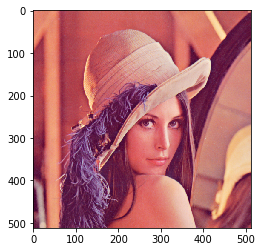

加密金鑰圖


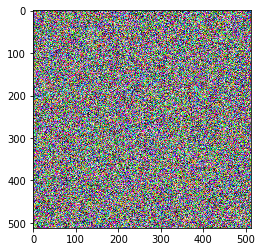

加密後的圖


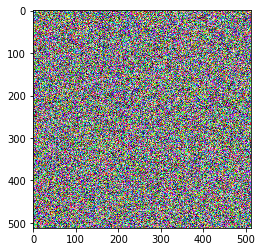

In [6]:
# 以亂數生成key當作加密圖片
img_key = np.random.randint(0, 255, img_RGB_lenna.shape, dtype = np.uint8)

# 將lenna圖以key圖做逐位元xor運算加密
img_encode = cv2.bitwise_xor(img_RGB_lenna, img_key)

print('原始彩色圖')
plt.imshow(img_RGB_lenna)
plt.show()

print('加密金鑰圖')
plt.imshow(img_key)
plt.show()

print('加密後的圖')
plt.imshow(img_encode)
plt.show()

加密後的圖


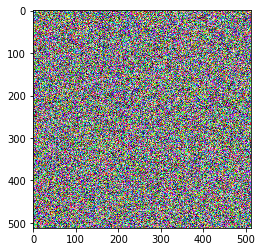

加密金鑰圖


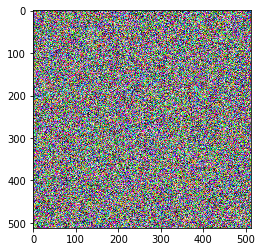

解密後的圖


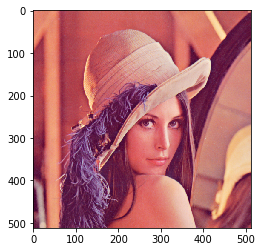

原圖與解密圖是否完全相等: True


In [7]:
# 將加密後的圖以key圖做逐位元xor運算解密
img_decode = cv2.bitwise_xor(img_encode, img_key)

print('加密後的圖')
plt.imshow(img_encode)
plt.show()

print('加密金鑰圖')
plt.imshow(img_key)
plt.show()

print('解密後的圖')
plt.imshow(img_decode)
plt.show()

print('原圖與解密圖是否完全相等:', (img_RGB_lenna == img_decode).all())

要切記，不能將加密圖與解密圖同時流出，因為由加密圖及解密圖可以計算出加密金鑰，日後有心人士就可以透過計算來的金鑰來破解所有加密影像。

|  pic1  |  pic2  |  key  |      rule      |
| ------ | ------ | ----- | -------------- |
|    0   |    0   |   0   |  xor(0, 0) = 0 |
|    0   |    1   |   1   |  xor(0, 1) = 1 |
|    1   |    1   |   0   |  xor(1, 1) = 0 |
|    1   |    0   |   1   |  xor(1, 0) = 1 |

加密後的圖


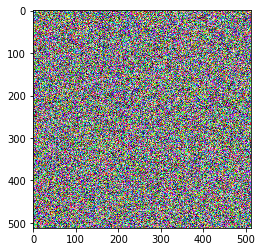

解密後的圖


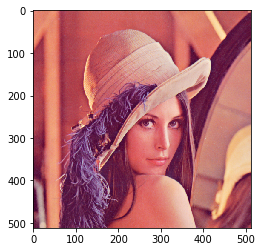

破解後的金鑰


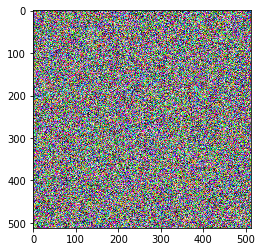

原始金鑰與計算後金鑰是否完全相等: True


In [8]:
# 將加密後的圖與解密後的圖做逐位元xor運算找出金鑰
img_key2 = cv2.bitwise_xor(img_encode, img_decode)

print('加密後的圖')
plt.imshow(img_encode)
plt.show()

print('解密後的圖')
plt.imshow(img_decode)
plt.show()

print('破解後的金鑰')
plt.imshow(img_key2)
plt.show()

print('原始金鑰與計算後金鑰是否完全相等:', (img_key == img_key2).all())

## 影像局部打碼及解碼

透過上述的加密方式對局部區域進行逐位元xor運算即可實現局部打碼及解碼功能。

取得lenna的臉


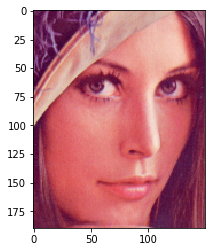

以臉的長寬製作亂數金鑰矩陣


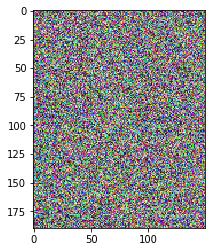

打碼結果


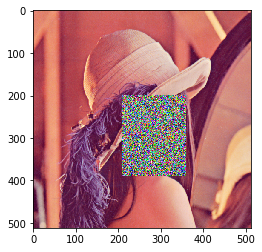

解碼結果


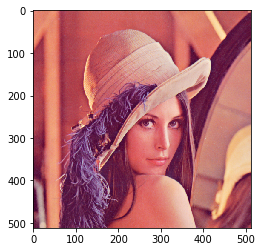

解碼後是否與原圖完全相等: True


In [9]:
# 以lenna圖臉部打碼為例
lenna_ROI = img_RGB_lenna[200:390, 210:360]
# 複製一個原始RGB圖
img_RGB_lenna_encode = img_RGB_lenna.copy()

# 以亂數生成key當作加密圖片
img_key = np.random.randint(0, 255, lenna_ROI.shape, dtype = np.uint8)

# 以逐位元xor運算將臉部打碼
lenna_face_encode = cv2.bitwise_xor(lenna_ROI, img_key)

# 將打碼結果套回原圖
img_RGB_lenna_encode[200:390, 210:360] = lenna_face_encode

# 對打碼區域進行解碼
lenna_face_decode = cv2.bitwise_xor(lenna_face_encode, img_key)

# 複製一個打碼圖
img_RGB_lenna_decode = img_RGB_lenna_encode.copy()
# 將解碼結果套回原圖
img_RGB_lenna_decode[200:390, 210:360] = lenna_face_decode


print('取得lenna的臉')
plt.imshow(lenna_ROI)
plt.show()

print('以臉的長寬製作亂數金鑰矩陣')
plt.imshow(img_key)
plt.show()

print('打碼結果')
plt.imshow(img_RGB_lenna_encode)
plt.show()

print('解碼結果')
plt.imshow(img_RGB_lenna_decode)
plt.show()

print('解碼後是否與原圖完全相等:', (img_RGB_lenna_decode == img_RGB_lenna).all())

## 影像浮水印

在位元平面分解時，我們知道第0階的位元平面對圖片的影響最小，可以修改此位元平面，將隱藏資訊或是圖片嵌入其中，卻不易從圖片中發現，而遷入的圖片只能是二值化的圖片(圖片中的像素值為0或255)，因為位元平面為二進位值所拆解出來的平面，其值僅有0或1，所以只能嵌入二值化影像。

原圖


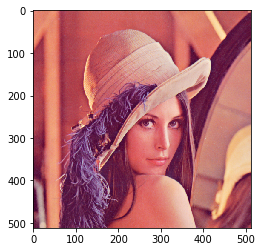

浮水印圖


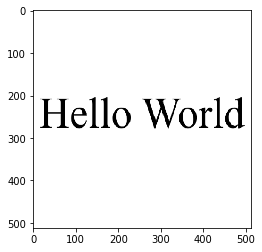

原圖+浮水印


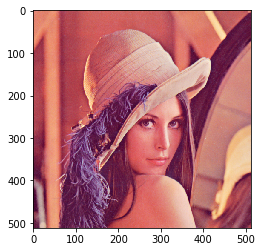

加上浮水印後是否與原圖完全相等: False


In [10]:
img_BGR_watermark_ori = cv2.imread('data/watermark.png')
# 複製一個watermark
img_BGR_watermark = img_BGR_watermark_ori.copy()

# 此浮水印並非2值化圖片，我們以127為界線，大於127改為1，小於等於127改為0，改為1的原因是方便嵌入(因為要嵌入二進位值的最後一位)
# 後續會介紹threshold方法處理二值化計算
img_BGR_watermark[img_BGR_watermark[:, :, :] <= 127] = 0
img_BGR_watermark[img_BGR_watermark[:, :, :] > 127] = 1

# 創造一個全是254的矩陣，因為254的二進位值為11111110，最後一位由浮水印決定
T254 = np.ones(img_RGB_lenna.shape, dtype = np.uint8) * 254

# 將此矩陣與lenna圖做逐位元and運算，前七位會直接複製lenna的前七為，第八位皆為0
img_RGB_lenna_seven = cv2.bitwise_and(T254, img_RGB_lenna)

# 最後將前七位的圖片與浮水印圖片做逐位元or運算，因為前七位的圖第八位的值皆為0，所以第八位的值等於直接複製浮水印的第八位值
img_RGB_lenna_with_watermark = cv2.bitwise_or(img_RGB_lenna_seven, img_BGR_watermark)

print('原圖')
plt.imshow(img_RGB_lenna)
plt.show()

print('浮水印圖')
plt.imshow(img_BGR_watermark_ori)
plt.show()

print('原圖+浮水印')
plt.imshow(img_RGB_lenna_with_watermark)
plt.show()

print('加上浮水印後是否與原圖完全相等:', (img_RGB_lenna == img_RGB_lenna_with_watermark).all())

浮水印圖


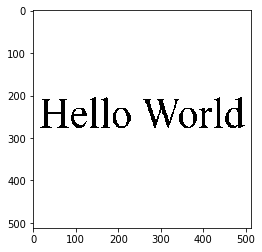

In [11]:
# 將浮水印拆出來，但是先前遺失的第0階位元平面已經無法再還原

# 創造一個全是1的矩陣，因為1的二進位值為00000001，做逐位元and運算時可以取得圖片的最後一位值
T1 = np.ones(img_RGB_lenna.shape, dtype = np.uint8)

watermark = np.bitwise_and(T1, img_RGB_lenna_with_watermark)

# 將watermark內1改為255方便顯示
watermark[watermark[:, :, :] > 0] = 255

print('浮水印圖')
plt.imshow(watermark)
plt.show()

其實還有別的方式可以拆解第0階位元平面嵌入的浮水印，因為最後一階的值為0或1，檢視像素為奇數或是偶數即可知道浮水印是1或0。

不過運算效率遠較`bitwise_and`慢。

浮水印圖


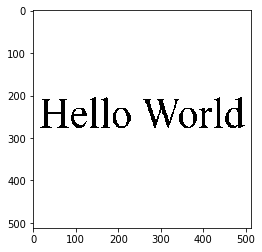

In [12]:
watermark = np.zeros(img_RGB_lenna.shape, dtype = np.uint8)

for i in range(img_RGB_lenna_with_watermark.shape[0]):
    for j in range(img_RGB_lenna_with_watermark.shape[1]):
        for k in range(img_RGB_lenna_with_watermark.shape[2]):
            if img_RGB_lenna_with_watermark[i, j, k] % 2 == 1:
                watermark[i, j, k] = 255
            
print('浮水印圖')
plt.imshow(watermark)
plt.show()

* 同理可以將浮水印嵌入到不同的位元平面，但是浮水印就會容易被看出來，對圖片的破壞較大。
* 雖然浮水印是二值化的值，但是不同通道還是可以組合成不同顏色，共有$2^3$種顏色組合，每個像素點[0或255, 0或255, 0或255]。